In [ ]:
'''
1. データの用意と前処理
'''
# Fashion-MNISTデータセットをインポート
from tensorflow.keras.datasets import fashion_mnist

## データセットの読み込みとデータの前処理

# Fashion-MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 訓練データ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') # float32型に変換
x_train /= 255                      # 0から1.0の範囲に変換

# テストデータ
# (10000, 28, 28)の3階テンソルを(10000, 28, 28, 1)の4階テンソルに変換
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test.astype('float32') # float32型に変換
x_test /= 255                     # 0から1.0の範囲に変換

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
'''
2. モデルの構築
'''
# keras.modelsからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDense、Conv2D、Flatten、Dropoutをインポート
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import SGD

model = Sequential()                 # Sequentialオブジェクトの生成

# 畳み込み層1
model.add(
    Conv2D(filters=32,               # フィルターの数は32
           kernel_size=(3, 3),       # 3×3のフィルターを使用
           padding='same',           # ゼロパディングを行う
           input_shape=(28, 28, 1),  # 入力データの形状                     
           activation='relu'         # 活性化関数はReLU
           ))

# 畳み込み層2
model.add(
    Conv2D(filters=64,               # フィルターの数は32
           kernel_size=(3, 3),       # 3×3のフィルターを使用
           padding='same',           # ゼロパディングを行う
           input_shape=(28, 28, 1),  # 入力データの形状                     
           activation='relu'         # 活性化関数はReLU
           ))
# プーリング層2
# (28, 28, 64)->(14, 14, 64)
model.add(
    MaxPooling2D(pool_size=(2,2))) # 縮小対象の領域は2x2
# ドロップアウト
model.add(Dropout(0.5))

# 畳み込み層3
model.add(
    Conv2D(filters=64,               # フィルターの数は32
           kernel_size=(3, 3),       # 3×3のフィルターを使用
           padding='same',           # ゼロパディングを行う
           input_shape=(28, 28, 1),  # 入力データの形状                     
           activation='relu'         # 活性化関数はReLU
           ))
# プーリング層2
# (14, 14, 64)->(7, 7, 64)
model.add(
    MaxPooling2D(pool_size=(2,2))) # 縮小対象の領域は2x2

# ドロップアウト
model.add(Dropout(0.5))
# Flatten: (7, 7, 64) -> (3136,)にフラット化
model.add(Flatten())

# 出力層
model.add(Dense(10,                  # 出力層のニューロン数は10
                activation='softmax' # 活性化関数はsoftmax
               ))

# オブジェクトのコンパイル
model.compile(
    loss='sparse_categorical_crossentropy', # スパース行列対応クロスエントロピー誤差
    optimizer=SGD(lr=0.1),           # 最適化アルゴリズムはSGD
    metrics=['accuracy'])            # 学習評価として正解率を指定

model.summary()                      # サマリを表示

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0

In [ ]:
%%time
'''
3. 学習する
'''
from tensorflow.keras.callbacks import EarlyStopping

# 学習回数、ミニバッチのサイズを設定
training_epochs = 100 # 学習回数
batch_size = 64       # ミニバッチのサイズ

# 早期終了を行うEarlyStoppingを生成
early_stopping = EarlyStopping(
    monitor='val_loss', # 監視対象は損失
    patience=5,         # 監視する回数
    verbose=1           # 早期終了をログとして出力
)

# 学習を行って結果を出力
history = model.fit(
    x_train,           # 訓練データ
    y_train,           # 正解ラベル
    epochs=training_epochs, # 学習を繰り返す回数
    batch_size=batch_size,  # ミニバッチのサイズ
    verbose=1,              # 学習の進捗状況を出力する
    validation_split= 0.2,  # 検証データとして使用する割合
    shuffle=True, # 検証データを抽出する際にシャッフルする
    callbacks=[early_stopping]# コールバックはリストで指定する
    )
# テストデータで学習を評価するデータを取得
score = model.evaluate(x_test, y_test, verbose=0)
# テストデータの損失を出力
print('Test loss:', score[0])
# テストデータの精度を出力
print('Test accuracy:', score[1])

Epoch 1/100
750/750 [==============================] - 12s 6ms/step - loss: 1.0081 - accuracy: 0.6503 - val_loss: 0.4353 - val_accuracy: 0.8370
Epoch 2/100
750/750 [==============================] - 4s 6ms/step - loss: 0.4682 - accuracy: 0.8315 - val_loss: 0.3707 - val_accuracy: 0.8702
Epoch 3/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3983 - accuracy: 0.8560 - val_loss: 0.3257 - val_accuracy: 0.8855
Epoch 4/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3744 - accuracy: 0.8644 - val_loss: 0.3060 - val_accuracy: 0.8937
Epoch 5/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3435 - accuracy: 0.8764 - val_loss: 0.3010 - val_accuracy: 0.8950
Epoch 6/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3258 - accuracy: 0.8832 - val_loss: 0.3038 - val_accuracy: 0.9011
Epoch 7/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3083 - accuracy: 0.8880 - val_loss: 0.2713 - val_accuracy: 0.909

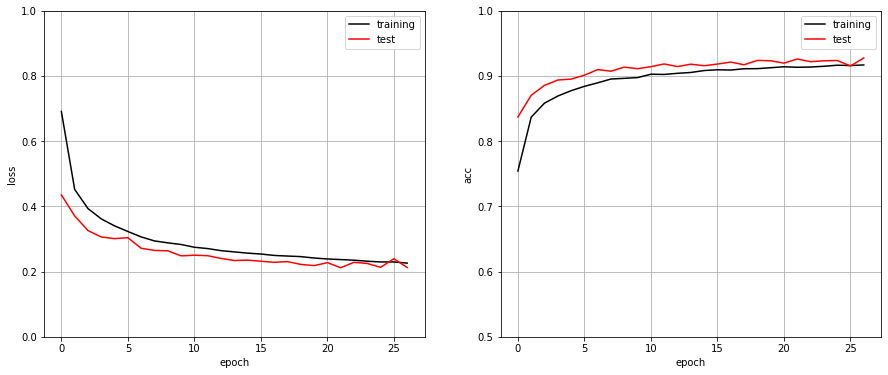

In [ ]:
'''
4. 損失と精度の推移をグラフにする
''' 
%matplotlib inline
import matplotlib.pyplot as plt

# プロット図のサイズを設定
plt.ﬁgure(ﬁgsize=(15, 6))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)

# 1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1, 2, 1)
# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(history.history['val_loss'],
         label='test',
         color='red')
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル

# 1×2のグリッドの右(1,2,21)の領域にプロット
plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(history.history['accuracy'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(history.history['val_accuracy'],
         label='test',
         color='red')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('acc')    # y軸ラベル
plt.show()